In [1]:
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ajl0618\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\ajl0618\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
import pandas as pd
import pyodbc
import numpy as np
from PBP_Benefit_Text import  Plan # Logic implemented in Benefit Module

In [3]:
spark = SparkSession.builder.appName("PBPPlanBuilder").getOrCreate()

In [4]:
#system parameters\
PBP_SOURCE_FOLDER = 'PBP_Benefits_2024/'
DR_TARGET_FOLDER = 'PBP_Benefits_2024_Results/'

In [5]:
# year parameter for CMS

PLAN_YEAR = 2024
RX_CATASTROHPIC_LIMIT = 8000
RX_INITIAL_COVERAGE_LIMIT = 5030
DEDAULT_RX_DEDUCTIBLE = 545
MEDICARE_DEDUCTIBLE_PART_A = 1632
MEDICARE_DEDUCTIBLE_PART_B = 240

In [6]:
# load all required files
def load_csv(csv_file_path):
    return spark.read.format("csv") \
    .option("delimiter", "\t") \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .load(csv_file_path)

# drop views from memory if the view exist
for t in spark.catalog.listTables():
    spark.catalog.dropTempView(t.name)

df_pbp_section_A = load_csv(PBP_SOURCE_FOLDER + 'pbp_Section_A.txt')

df_pbp_section_A.createTempView('pbp_section_A')

df_pbp_mrx = load_csv(PBP_SOURCE_FOLDER + 'pbp_mrx.txt')
df_pbp_mrx.createTempView('pbp_mrx')

df_pbp_Section_C = load_csv(PBP_SOURCE_FOLDER + 'pbp_Section_C.txt')
df_pbp_Section_C.createTempView('pbp_Section_C')

df_pbp_Section_C_OON = load_csv(PBP_SOURCE_FOLDER + 'pbp_Section_C_OON.txt')
df_pbp_Section_C_OON.createTempView('pbp_Section_C_OON')

df_pbp_Section_C_POS = load_csv(PBP_SOURCE_FOLDER + 'pbp_Section_C_POS.txt')
df_pbp_Section_C_POS.createTempView('pbp_Section_C_POS')

df_pbp_Section_D = load_csv(PBP_SOURCE_FOLDER + 'pbp_Section_D.txt')
df_pbp_Section_D.createTempView('pbp_Section_D')

df_pbp_b1a_inpat_hosp = load_csv(PBP_SOURCE_FOLDER + 'pbp_b1a_inpat_hosp.txt')
df_pbp_b1a_inpat_hosp.createTempView('pbp_b1a_inpat_hosp')


df_pbp_b2_snf = load_csv(PBP_SOURCE_FOLDER + 'pbp_b2_snf.txt')
df_pbp_b2_snf.createTempView('pbp_b2_snf')

df_pbp_step2 = load_csv(PBP_SOURCE_FOLDER + 'pbp_step2.txt')
df_pbp_step2.createTempView('pbp_step2')


df_pbp_b4_emerg_urgent =load_csv(PBP_SOURCE_FOLDER + 'pbp_b4_emerg_urgent.txt')
df_pbp_b4_emerg_urgent.createTempView('pbp_b4_emerg_urgent')


df_pbp_b7_health_prof = load_csv(PBP_SOURCE_FOLDER + 'pbp_b7_health_prof.txt')
df_pbp_b7_health_prof.createTempView('pbp_b7_health_prof')

df_pbp_b8_clin_diag_ther =load_csv(PBP_SOURCE_FOLDER + 'pbp_b8_clin_diag_ther.txt')
df_pbp_b8_clin_diag_ther.createTempView('pbp_b8_clin_diag_ther')

df_pbp_b9_outpat_hosp = load_csv(PBP_SOURCE_FOLDER + 'pbp_b9_outpat_hosp.txt')
df_pbp_b9_outpat_hosp.createTempView('pbp_b9_outpat_hosp')

df_pbp_b10_amb_trans =load_csv(PBP_SOURCE_FOLDER + 'pbp_b10_amb_trans.txt')
df_pbp_b10_amb_trans.createTempView('pbp_b10_amb_trans')

df_pbp_b11_dme_prosth_orth_sup =load_csv(PBP_SOURCE_FOLDER + 'pbp_b11_dme_prosth_orth_sup.txt')
df_pbp_b11_dme_prosth_orth_sup.createTempView('pbp_b11_dme_prosth_orth_sup')

df_pbp_b14_preventive =load_csv(PBP_SOURCE_FOLDER + 'pbp_b14_preventive.txt')
df_pbp_b14_preventive.createTempView('pbp_b14_preventive')

df_pbp_b15_partb_rx_drugs= load_csv(PBP_SOURCE_FOLDER + 'pbp_b15_partb_rx_drugs.txt')
df_pbp_b15_partb_rx_drugs.createTempView('pbp_b15_partb_rx_drugs')

df_pbp_b16_dental= load_csv(PBP_SOURCE_FOLDER + 'pbp_b16_dental.txt')
df_pbp_b16_dental.createTempView('pbp_b16_dental')

df_pbp_b17_eye_exams_wear_aids =load_csv(PBP_SOURCE_FOLDER + 'pbp_b17_eye_exams_wear.txt')
df_pbp_b17_eye_exams_wear_aids.createTempView('pbp_b17_eye_exams_wear')

df_pbp_b18_hearing_exams_aids =load_csv(PBP_SOURCE_FOLDER + 'pbp_b18_hearing_exams_aids.txt')
df_pbp_b18_hearing_exams_aids.createTempView('pbp_b18_hearing_exams_aids')

df_pbp_b18_b19b_hearing_exams_aids_vbid_uf =load_csv(PBP_SOURCE_FOLDER + 'pbp_b18_b19b_hearing_exams_aids_vbid_uf.txt')
df_pbp_b18_b19b_hearing_exams_aids_vbid_uf.createTempView('pbp_b18_b19b_hearing_exams_aids_vbid_uf')

In [7]:
#List of utility functions
def write_to_csv_file(df, file_name):
    pandas_df = df.toPandas()
    pandas_df.to_csv(DR_TARGET_FOLDER + file_name + '.csv', index=False)

def read_pd_from_csv_file(file_name):
    return pd.read_csv(DR_TARGET_FOLDER + file_name + '.csv')

def write_pd_to_csv(df, file_name):
    df.to_csv(DR_TARGET_FOLDER + file_name + '.csv', index=False)

def convert_to_int(field, null_value):
    if field is None:
        return null_value
    return int(field)

def convert_to_currency(float_field):
    return '${:,.2f}'.format(float_field)

def convert_to_currency_no_decimal(float_field):
    return '${:,.0f}'.format(float_field)

def drop_pbp_mrx_columns(df):
	pbp_mrx_columns = []
	for column_name in df.columns:
		if column_name.lower().startswith('pbp_') or column_name.lower().startswith('mrx_'):
			pbp_mrx_columns.append(column_name)
	df = df.drop(pbp_mrx_columns, axis=1)
	return df

def drop_pbp_mrx_columns(df):
	pbp_mrx_columns = []
	for column_name in df.columns:
		if column_name.lower().startswith('pbp_') or column_name.lower().startswith('mrx_'):
			pbp_mrx_columns.append(column_name)
	df = df.drop(pbp_mrx_columns, axis=1)
	return df


In [8]:
# Carrier, Organization, Plans
# Source: HPMS..[usp_loadCarriersPUF] 
def get_plan_type(pbp_a_eghp_yn, pbp_a_org_type, pbp_a_plan_type, mrx_benefit_type):
	'''
	Source: HPSM..usp_loadCarriersPUF_2023
	'''
	pbp_a_eghp_yn = int(pbp_a_eghp_yn)
	pbp_a_org_type = int(pbp_a_org_type)
	pbp_a_plan_type = int(pbp_a_plan_type)
	if mrx_benefit_type in [1,2,3,4]:
		mrx_drug_ben_yn = 1
	if pbp_a_org_type == 10 and pbp_a_plan_type == 29 and mrx_drug_ben_yn == 1:
		return 'PDP'
	elif mrx_benefit_type == 1:
		return 'MAPD'
	return 'MA'

def get_snp_type(pbp_a_special_need_flag, pbp_a_special_need_plan_type):
	pbp_a_special_need_flag = int(pbp_a_special_need_flag)
	if pbp_a_special_need_flag == 1:
		pbp_a_special_need_plan_type = int(pbp_a_special_need_plan_type)
		if pbp_a_special_need_plan_type == 1: #	Institutional
			return 'I-SNP'
		if pbp_a_special_need_plan_type == 3: #	Dual-Eligible
			return 'D-SNP'
		if pbp_a_special_need_plan_type == 4: #	Chronic or Disabling Condition
			return 'C-SNP'
	return ''

def get_qid(ContractID, PlanID, SegmentID):
	return ContractID + ('000' + str(PlanID))[-3:] + ('000' + str(SegmentID))[-3:]

def get_qid_from_bid_id(bid_id):
	bid_id_splited = bid_id.split('_')
	bid_id_splited[1] = ('00' + bid_id_splited[1])[-3:]
	bid_id_splited[2] = ('00' + bid_id_splited[2])[-3:]
	return ''.join(bid_id_splited)

def get_medical_plan_type_code(pbp_a_plan_type):
	'''
	Source: hpms.dbo.f_getMedicalPlanTypeCode
	'''
	if pbp_a_plan_type is not None:
		pbp_a_plan_type = int(pbp_a_plan_type)
		if pbp_a_plan_type == 1:return 10 # 'HMO'
		if pbp_a_plan_type == 2: return 120 #'HMOPOS'
		if pbp_a_plan_type == 4: return 140 #'Local PPO'
		if pbp_a_plan_type == 5: return 230 #'PSO (State License)'#??
		if pbp_a_plan_type == 7: return 110 #'MSA'#??
		if pbp_a_plan_type == 8: return 240 #'RFB PFFS'#??
		if pbp_a_plan_type == 9: return 220 #'PFFS'
		if pbp_a_plan_type == 18: return 80 #'1876 Cost'#?? cost plan?
		if pbp_a_plan_type == 19: return 80 #'HCPP - 1833 Cost'#?? cost plan?
		if pbp_a_plan_type == 20: return 90 #'National Pace'#??
		if pbp_a_plan_type == 29: return 190 #'Medicare Prescription Drug Plan' # PDP
		if pbp_a_plan_type == 30: return 190# 'Employer/Union Only Direct Contract PDP' # PDP
		if pbp_a_plan_type == 31: return 130 #'Regional PPO' # RPPO
		if pbp_a_plan_type == 32: return 250 #'Fallback'#??
		if pbp_a_plan_type == 40: return 70 #'Employer/Union Only Direct Contract PFFS'# PFFS
		if pbp_a_plan_type == 42: return 260 #'RFB HMO'
		if pbp_a_plan_type == 43: return 270 #'RFB HMOPOS'
		if pbp_a_plan_type == 44: return 280 #'RFB Local PPO'
		if pbp_a_plan_type == 45: return 290 #'RFB PSO (State License)'
		if pbp_a_plan_type == 47: return 300 #'Employer Direct PPO'
		if pbp_a_plan_type == 48: return 100 #'MMP HMO'
		if pbp_a_plan_type == 49: return 100 #'MMP HMOPOS'
	return 0 #'unknown'

def get_rx_deductible_limit(mrx_alt_ded_amount, mrx_alt_ded_charge):
	if not np.isnan(mrx_alt_ded_amount):
		return mrx_alt_ded_amount
	if not np.isnan(mrx_alt_ded_charge):
		if int(mrx_alt_ded_charge) == 1:
			return float(DEDAULT_RX_DEDUCTIBLE)
	return float(0)

query = f'''
SELECT 
	{PLAN_YEAR} as PlanYear,    
	PBP_A_ORG_MARKETING_NAME as CarrierName, pbp_a_org_name as OrganizationName, PBP_A_ORG_WEBSITE as WebSiteAddress,
	a.PBP_A_CONTRACT_NUMBER as ContractID,	
	a.pbp_a_plan_identifier1 as PlanID, 	
	a.PBP_A_SEGMENT_ID as SegmentID, 
	PBP_A_PLAN_NAME as PlanName, 
	PBP_A_PLAN_GEOG_NAME as GeoName, 
	PBP_A_ORG_MARKETING_NAME as CarrierName, 
	pbp_a_org_name as OrganizationName,
	m.PBP_A_PLAN_TYPE as MedicalPlanType,
	pbp_a_eghp_yn, PBP_A_ORG_TYPE, pbp_a_snp_pct, pbp_a_snp_cond, m.PBP_A_PLAN_TYPE,
	pbp_a_special_need_flag, pbp_a_special_need_plan_type, 
	mrx_alt_ded_amount, mrx_alt_ded_charge, mrx_benefit_type
FROM pbp_section_A a 
	left join pbp_mrx m on a.bid_id = m.bid_id
	left join pbp_Section_D d on a.bid_id = d.bid_id
	where cast(pbp_a_eghp_yn as int) = 2 and cast(m.PBP_A_PLAN_TYPE as int) in (1, 2, 4, 9, 29, 31, 42, 43, 44, 45 )
	and CAST(a.pbp_a_plan_identifier1 AS INT) < 800
'''

df_plans = spark.sql(query)
write_to_csv_file(df_plans, 'Plans')

#Add calculated columns
df_plans = read_pd_from_csv_file('Plans')
df_plans['PlanType'] = df_plans.apply(lambda x: get_plan_type(x.pbp_a_eghp_yn,x.PBP_A_ORG_TYPE, x.PBP_A_PLAN_TYPE, x.mrx_benefit_type), axis=1)
df_plans['SNPType'] =  df_plans.apply(lambda x: get_snp_type(x.pbp_a_special_need_flag, x.pbp_a_special_need_plan_type), axis=1)
df_plans['QID'] = df_plans.apply(lambda x: get_qid(x.ContractID, x.PlanID, x.SegmentID), axis=1)
df_plans['DrugDeductibleLimit'] = df_plans.apply(lambda x: get_rx_deductible_limit(x.mrx_alt_ded_amount, x.mrx_alt_ded_charge), axis=1)
df_plans = drop_pbp_mrx_columns(df_plans)

write_pd_to_csv(df_plans, 'Plans')

In [9]:
'''
Matching DF for DR..MedicalBenefits
'''
pandas_df_medicalbenefits = pd.DataFrame(columns = ['QID', 'PlanYear', 'CategoryName', 'ServiceName', 'Network', 'CostShare'])


# add to pandas_df_medicalbenefits if there is no mismatching
def add_category_benefit_to_df_medicalbenefits(df, df_all):
    df_new_category_service_network = df[['CategoryName', 'ServiceName', 'Network']].drop_duplicates()
    for index, csn in df_new_category_service_network.iterrows():
        category_name = csn['CategoryName']
        service_name = csn['ServiceName']
        network = csn['Network']
        df_existing = df_all[(df_all['CategoryName'] == category_name) &  (df_all['CategoryName'] == category_name)& (df_all['Network'] == network)]
        if len(df_existing) > 0:
            df_all.drop(df_all.index, inplace=True)
    df_selected = df[df_all.columns.tolist()]
    df_all = pd.concat([df_all, df_selected], ignore_index=True)
    return df_all


MEDICARE_CRAWLED_DATA = 'MedicareCrawledData'
medicare_crawled_data_file_path = f'{DR_TARGET_FOLDER}{MEDICARE_CRAWLED_DATA}.csv'
df_medicare_displaying_benefits = read_pd_from_csv_file(MEDICARE_CRAWLED_DATA)


#utility method to compare
def matched(benefit1, benefit2):
    if benefit1 is None and benefit2 is not None:
      return False
    if benefit1.strip().lower().replace('.', '').replace('$', '').replace(' ', '').replace('<br/>', '') == benefit2.strip().lower().replace('.', '').replace('$', '').replace(' ', '').replace('<br/>', ''):
        return True
    return benefit1.strip().lower().replace('.', '').replace('$', '').replace(' ', '').replace('<br/>', '') == benefit2.strip().lower().replace('.', '').replace('$', '').replace(' ', '').replace('<br/>', '').replace(f'0%or', '0or')

def get_medicare_site_url(qid):
    contractid = qid[:5]
    planid = qid[5:8]
    segmentid = qid[8:]
    return f'https://www.medicare.gov/plan-compare/#/plan-details/{PLAN_YEAR}-{contractid}-{planid}-{int(segmentid)}?year={PLAN_YEAR}&lang=en#benefits'



In [10]:
def explode_inn_oon_costshare(df_benefits):
    df_benefits_inn_only = df_benefits[(df_benefits['INN_CostShare'] != '') & (df_benefits['OON_CostShare'] == '')]
    df_benefits_inn_only = df_benefits_inn_only[['PlanYear','QID','CategoryName','ServiceName','INN_CostShare','Medicare.gov URL']]
    df_benefits_inn_only['Network'] = ''
    df_benefits_inn_only.rename(columns={"INN_CostShare": "CostShare"}, inplace=True)

    df_benefits_inn_out = df_benefits[(df_benefits['INN_CostShare'] != '') & (df_benefits['OON_CostShare'] != '')]
    df_benefits_inn_out_inn = df_benefits_inn_out[['PlanYear','QID','CategoryName','ServiceName','INN_CostShare','Medicare.gov URL']]
    df_benefits_inn_out_inn['Network'] = 'In-network'
    df_benefits_inn_out_inn.rename(columns={"INN_CostShare": "CostShare"}, inplace=True)

    df_benefits_inn_out_out = df_benefits_inn_out[['PlanYear','QID','CategoryName','ServiceName','OON_CostShare','Medicare.gov URL']]
    df_benefits_inn_out_out['Network'] = 'Out-of-network'
    df_benefits_inn_out_out.rename(columns={"OON_CostShare": "CostShare"}, inplace=True)
    return pd.concat([df_benefits_inn_only, df_benefits_inn_out_inn, df_benefits_inn_out_out])

In [11]:
# utility function to nomarlize dataframe
import re
def classify_cost_share(costshare):
    costshare = costshare.strip()
    if costshare == '$0 copay':
        return 'Zero Copay'
    elif costshare == 'Not covered':
        return 'NOT COVERED'
    elif re.search(f"^\$0+ or \$\d+ copay$", costshare):
        return 'Zero or Copay'
    elif re.search(f"^0\%+ or \d+\% coinsurance$", costshare):
        return 'Zero or Coinsurance'
    elif re.search(f"^0\%+ or \d+-\d+\% coinsurance$", costshare):
        return 'Zero or MIN-MAX Coinsurance'
    elif re.search(f'^\$\d+\-\d+ copay or \d+-\d+\% coinsurance$', costshare):
        return 'MIN-MAX copay or MIN-MAX coinsurance'
    elif re.search(f'^\$\d+\-\d+ copay or \d+\% coinsurance$', costshare):
        return 'MIN-MAX copay or coinsurance'
    elif re.search(f'^\$\d+ copay or \d+% coinsurance$', costshare):
        return 'Copay or Coinsurance'
    elif re.search('^\$\d+\-\d+ copay$', costshare):
        return f'MIN-MAX copay'
    elif re.search('^\$\d+\-\$\d+ copay$', costshare):
        return f'MIN-MAX copay'
    elif re.search(f'^\d+-\d+\% coinsurance$', costshare):
        return f'MIN-MAX coinsurance'
    elif re.search(f"^\d+\% coinsurance$", costshare):
        return 'Coinsurance'
    elif re.search(f"^\$\d+ copay$", costshare):
        return 'Copay'
    raise(Exception('Not Category:' + costshare))

In [12]:
# HEARING	Hearing exam
# Benefit Code = 18a1
# In-Network & Out-of-Network
# uses Non-Medicare (NMC) for out-of-network if NMC is available

query = f'''select	
	a.PBP_A_CONTRACT_NUMBER as ContractID,	
	a.pbp_a_plan_identifier1 as PlanID, 	
	a.PBP_A_SEGMENT_ID as SegmentID,  
    pbp_a_special_need_plan_type, pbp_a_dsnp_zerodollar, pbp_a_snp_state_cvg_yn,
    pbp_b18a_bendesc_yn,
    pbp_b18a_bendesc_ehc,
    pbp_b18a_maxenr_yn,
    pbp_b18a_maxenr_amt,
    pbp_b18a_coins_yn,    
    pbp_b18a_coins_ehc,
    pbp_b18a_med_coins_pct,
    pbp_b18a_med_coins_pct_max,
    pbp_b18a_coins_pct_rht,
    pbp_b18a_coins_pct_max_rht,
    pbp_b18a_coins_pct_fha,
    pbp_b18a_coins_pct_max_fha,
    pbp_b18a_copay_yn,
    pbp_b18a_copay_ehc,
    pbp_b18a_copay_amt,
    pbp_b18a_med_copay_amt_max,
    pbp_b18a_copay_amt_rht,
    pbp_b18a_copay_amt_max_rht,
    pbp_b18a_copay_amt_fha,
    pbp_b18a_copay_amt_max_fha,
    c.pbp_c_oon_yn, pbp_c_pos_yn, 
    pbp_c_oon_outpt_maxplan_yn,pbp_c_oon_outpt_maxplan_amt,pbp_c_oon_outpt_maxplan_per,pbp_c_oon_outpt_maxplan_per_d,
    pbp_c_oon_outpt_coins_yn,pbp_c_oon_outpt_coins_min_pct,pbp_c_oon_outpt_coins_max_pct,
    pbp_c_oon_outpt_copay_yn,pbp_c_oon_outpt_copay_min_amt,pbp_c_oon_outpt_copay_max_amt,
    pbp_c_oon_outpt_ded_yn,pbp_c_oon_outpt_ded_amt,
    pbp_c_pos_yn,
    pbp_c_pos_outpt_coins_yn,pbp_c_pos_outpt_coins_min_pct,pbp_c_pos_outpt_coins_max_pct,
    pbp_c_pos_outpt_copay_yn,pbp_c_pos_outpt_copay_min_amt,pbp_c_pos_outpt_copay_max_amt,
    pbp_c_pos_outpt_maxplan_yn,pbp_c_pos_outpt_maxplan_amt,pbp_c_pos_outpt_maxplan_per,pbp_c_pos_outpt_maxplan_per_d,pbp_c_pos_outpt_deduct_yn,pbp_c_pos_outpt_deduct_amt
from 
pbp_Section_A a 
inner join pbp_Section_C c on a.bid_id = c.bid_id
inner join pbp_b18_hearing_exams_aids b on c.bid_id = b.bid_id
left join pbp_Section_C_OON coon_nmc on c.bid_id = coon_nmc.bid_id and concat(';', COALESCE(coon_nmc.pbp_c_oon_out_nmc_bendesc_cats, '')) like '%;18a;%'
left join pbp_Section_C_POS cpos_nmc on c.bid_id = cpos_nmc.bid_id and concat(';', COALESCE(cpos_nmc.pbp_c_pos_outpt_nmc_bencats, '')) like '%;18a;%'
where CAST(c.pbp_a_plan_identifier AS INT) < 800 and cast(pbp_a_eghp_yn as int) = 2  
and cast(c.PBP_A_PLAN_TYPE as int) in (1, 2, 4, 9, 29, 31, 42, 43, 44, 45 )
'''
df_18a1 = spark.sql(query)
write_to_csv_file(df_18a1, 'MedicalBenefits_18a1_DataSource')

df_medical_benefits_18a1 = read_pd_from_csv_file('MedicalBenefits_18a1_DataSource')
df_medical_benefits_18a1['PlanYear'] = 2024
df_medical_benefits_18a1['QID'] = df_medical_benefits_18a1.apply(lambda x: Plan.get_QID(x), axis=1)
df_medical_benefits_18a1['CategoryName'] = 'HEARING'
df_medical_benefits_18a1['ServiceName'] = 'Hearing exam'

In [13]:
df_medical_benefits = df_medical_benefits_18a1
print('pbp data row count:', len(df_medical_benefits))
service_code = '18a1'
#get target category and service name costshare (Target)
target_category = df_medical_benefits.iloc[0]['CategoryName']
target_service = df_medical_benefits.iloc[0]['ServiceName']
target_networks = ['', 'In-network']

pbp data row count: 5728


In [14]:
df_medicare_displaying_benefits['Network'].fillna('', inplace=True)
df_medicare_displaying_benefits_servie = df_medicare_displaying_benefits[(df_medicare_displaying_benefits.CategoryName == target_category) & (df_medicare_displaying_benefits.ServiceName == target_service) & (df_medicare_displaying_benefits.Network.isin(target_networks))]
                       
df_medicare_displaying_benefits_servie['CostShare'] = df_medicare_displaying_benefits_servie['CostShare'].apply(lambda x: x.replace('(Limits apply)', '').replace('<br/>', '').replace('<br />', '').replace('per visit', '').replace('per item', ''))

joined_df= pd.merge(df_medical_benefits, df_medicare_displaying_benefits_servie, how='inner', on=['PlanYear',	'QID', 'CategoryName', 'ServiceName'])

joined_df['Classified_CostShare'] = joined_df.apply(lambda x: classify_cost_share(x.CostShare), axis=1)
joined_df.drop(['ContractID','PlanID','SegmentID', 'PlanYear','QID','CategoryName','ServiceName','PlanName','PlanType','Network', 'CostShare'], inplace=True, axis=1)

joined_df.drop_duplicates(inplace=True)
print('Sample Data file rows', len(joined_df))
write_pd_to_csv(joined_df, f'PBP_Decision_Tree_Data_Samples_{service_code}')


Sample Data file rows 344


C:\Users\ajl0618\AppData\Local\Temp\ipykernel_3036\3996520815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_medicare_displaying_benefits['Network'].fillna('', inplace=True)
C:\Users\ajl0618\AppData\Local\Temp\ipykernel_3036\3996520815.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [15]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt


In [16]:
#split dataset in features and target variable
pima = joined_df
feature_cols = [x for x in joined_df.columns if x != 'Classified_CostShare']
x = pima[feature_cols] # Features
y = pima.Classified_CostShare # Target variable


['Zero Copay', 'NOT COVERED']
['pbp_a_special_need_plan_type', 'pbp_a_dsnp_zerodollar', 'pbp_a_snp_state_cvg_yn', 'pbp_b18a_bendesc_yn', 'pbp_b18a_bendesc_ehc', 'pbp_b18a_maxenr_yn', 'pbp_b18a_maxenr_amt', 'pbp_b18a_coins_yn', 'pbp_b18a_coins_ehc', 'pbp_b18a_med_coins_pct', 'pbp_b18a_med_coins_pct_max', 'pbp_b18a_coins_pct_rht', 'pbp_b18a_coins_pct_max_rht', 'pbp_b18a_coins_pct_fha', 'pbp_b18a_coins_pct_max_fha', 'pbp_b18a_copay_yn', 'pbp_b18a_copay_ehc', 'pbp_b18a_copay_amt', 'pbp_b18a_med_copay_amt_max', 'pbp_b18a_copay_amt_rht', 'pbp_b18a_copay_amt_max_rht', 'pbp_b18a_copay_amt_fha', 'pbp_b18a_copay_amt_max_fha', 'pbp_c_oon_yn', 'pbp_c_pos_yn', 'pbp_c_oon_outpt_maxplan_yn', 'pbp_c_oon_outpt_maxplan_amt', 'pbp_c_oon_outpt_maxplan_per', 'pbp_c_oon_outpt_maxplan_per_d', 'pbp_c_oon_outpt_coins_yn', 'pbp_c_oon_outpt_coins_min_pct', 'pbp_c_oon_outpt_coins_max_pct', 'pbp_c_oon_outpt_copay_yn', 'pbp_c_oon_outpt_copay_min_amt', 'pbp_c_oon_outpt_copay_max_amt', 'pbp_c_oon_outpt_ded_yn', 'pbp_

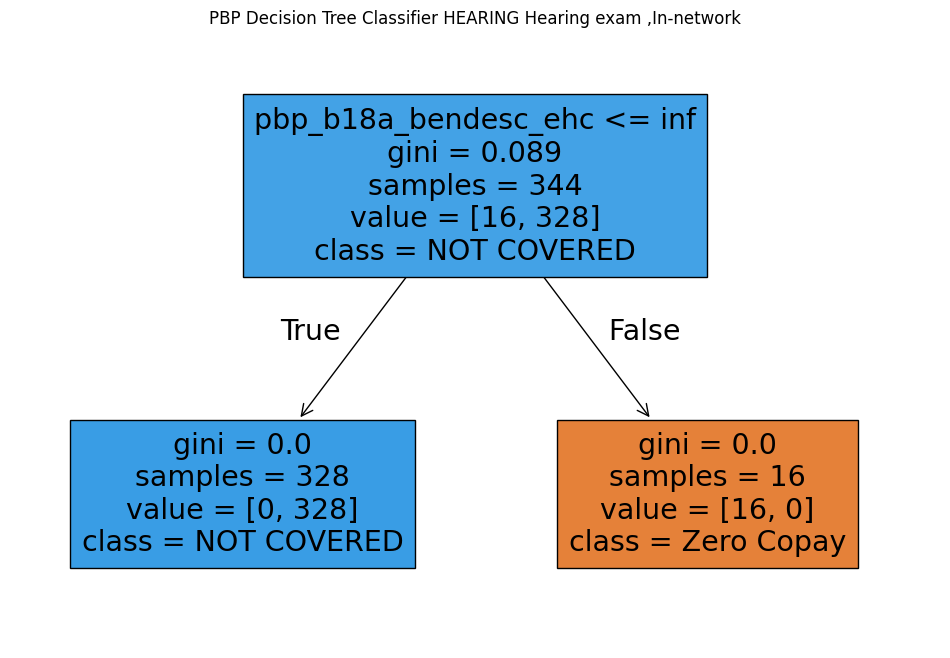

In [17]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree classifier
clf = clf.fit(x, y)


unique_Classified_CostShare =  joined_df['Classified_CostShare']
unique_Classified_CostShare.drop_duplicates(inplace=True)
uniqud_classified_costshare = unique_Classified_CostShare.to_list()

print(uniqud_classified_costshare)
print(feature_cols)
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=feature_cols, class_names=uniqud_classified_costshare)
title = f"PBP Decision Tree Classifier {target_category} {target_service} {','.join(target_networks)}"
plt.title(title)
# Save the plot as an image file (e.g., PNG)
plt.savefig( title + '.png', dpi=300)  # Adjust the filename and DPI as desired

plt.show(title)